#### Lendo dados pós processo de data prep

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import pod_academy_functions as pod

-----------------------------------------------------
------------ PoD Academy Functions ------------------
Só Alegria!
Você está usando o pacote de funções da PoD Academy
Turma: 2023
Autor: PoD Academy
Professor: Bruno Jardim
Versão: 1.0.0
Data: 08/10/2023
-----------------------------------------------------


In [2]:
abt_00 = pd.read_csv('abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_00.shape

(416648, 57)

In [3]:
abt_00.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2.568989,-0.542601,1.695565,1.182765,-0.31183,-0.806035,-0.587823,2.259801,-0.477413,-0.019166,...,0.464250,0.665396,0.896386,-0.373426,0.770766,0.897048,-0.634586,-0.730772,2.350925,0
1,1.561116,-0.542601,-0.527733,1.182765,-0.31183,-0.806035,1.701191,-0.442517,-0.477413,-0.019166,...,-0.367316,1.845816,1.624615,-0.373426,0.770766,0.897048,-0.634586,1.368416,-0.425364,0
2,-0.958565,-0.542601,0.583916,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,1.295816,0.665396,0.896386,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364,0
3,-0.958565,-0.542601,-0.157184,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,1.295816,0.665396,0.168156,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364,0
4,-0.454629,-0.542601,-0.898283,-0.845588,-0.31183,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,-0.367316,0.665396,-0.924188,-0.373426,0.770766,0.897048,1.575831,1.368416,-0.425364,1


In [4]:
X = abt_00.drop(axis=1,columns='target')
y = abt_00.target

# Treinar modelo com algoritmo Random Forest (Calma, não precisa focar no modelo neste momento)
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

RandomForestClassifier()

Número de features selecionadas:  14


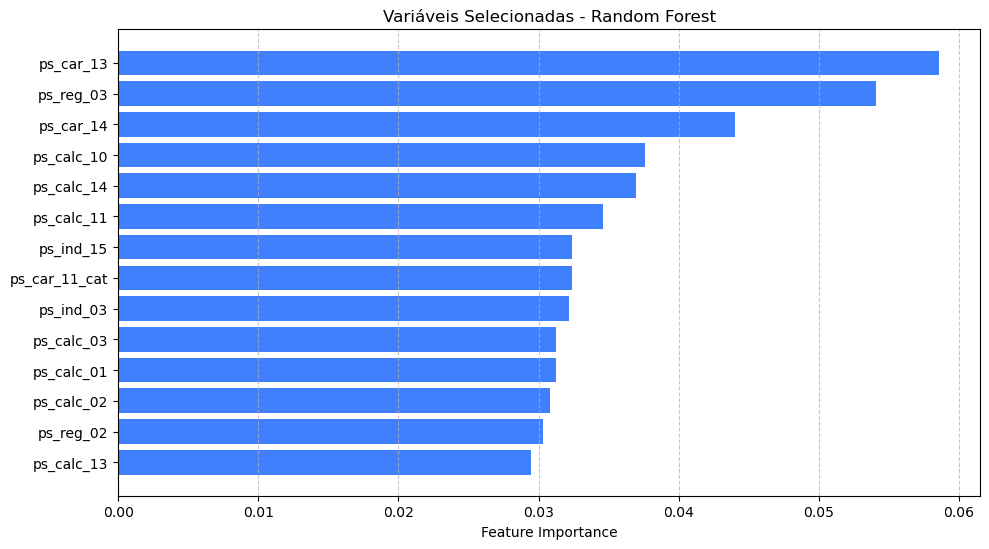

In [5]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.5

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('prd_list_features_a014.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [7]:
# Carregar a lista do arquivo .pkl
with open('prd_list_features_a014.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['ps_ind_03', 'ps_ind_15', 'ps_reg_02', 'ps_reg_03', 'ps_car_11_cat', 'ps_car_13', 'ps_car_14', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_10', 'ps_calc_11', 'ps_calc_13', 'ps_calc_14']


In [8]:
lista_features = loaded_lista + ['target']
abt_01 = abt_00[lista_features]

abt_01.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_13,ps_calc_14,target
0,1.695565,0.761809,2.869279,2.551830e+00,1.265515,3.282777,0.933695,0.870596,1.570820,-0.869620,-0.493106,-0.189128,0.665396,0.896386,0
1,-0.527733,0.479805,0.149555,-2.906527e-01,0.689777,-0.510640,0.517388,1.567305,0.873885,1.220110,-1.182005,-1.045842,1.845816,1.624615,0
2,0.583916,-2.058230,2.374783,1.072055e+00,1.265515,-1.087392,0.416784,1.218950,-0.868451,1.220110,1.918039,-0.617485,0.665396,0.896386,0
3,-0.157184,-0.366207,-0.839435,-3.550803e-16,-0.673815,-0.190735,0.152728,-1.219531,-1.565385,1.220110,0.195793,-0.189128,0.665396,0.168156,0
4,-0.898283,-0.366207,0.149555,-4.247585e-01,-1.522272,0.075932,-1.134278,1.218950,-0.171516,1.568398,-1.526454,1.095943,0.665396,-0.924188,1


In [9]:
abt_test = pd.read_csv('abt_test.csv')
abt_test.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_test.shape

(178564, 57)

In [10]:
lista_features = loaded_lista + ['target']
abt_01_test = abt_test[lista_features]

abt_01_test.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_13,ps_calc_14,target
0,0.213366,0.197801,2.374783,1.516008,-1.401063,-0.963025,-0.027872,-1.567885,-0.519983,-0.869620,-0.493106,0.667586,-0.515024,-1.652418,0
1,2.066114,-0.648211,2.374783,2.891407,1.265515,1.890850,1.621810,-0.522822,1.222352,-0.521332,0.195793,0.239229,0.075186,-0.924188,0
2,1.695565,0.761809,-0.839435,0.000000,-0.946533,-1.186010,0.000000,-0.871176,0.525418,-0.521332,1.229141,-1.045842,-1.695444,-0.195959,0
3,0.954465,-1.212218,2.127536,-0.081487,1.053401,0.271939,-1.735980,-0.174467,1.222352,-1.217908,-1.182005,-1.902556,0.075186,-0.560074,0
4,-0.527733,1.325816,-0.097692,-0.488588,-0.734419,-0.324480,-0.337731,-1.567885,1.222352,1.568398,0.540242,0.239229,1.255606,-0.560074,0


In [12]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('abt_fs01_train.csv')
abt_01_test.to_csv('abt_fs01_test.csv')